#Task 1: Define the Problem

##people are gonna die

#Task 2a: Install the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

#Task 2b: Import the Needed Libraries

#Task 3: Load the Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_test.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
data.head()

##Get Data Info

In [ ]:
data.shape

In [ ]:
data.info

In [ ]:
data.describe()

In [ ]:
data.columns

##Find Missing Values
###cabin is mostly missing, but maybe it's just that steerage has no cabin assignment. so effectively 3rd class passengers are all in one "cabin," the basement. Hull. thing. 

In [ ]:
#generate missing counts and heat maps to assess missing data
print("data",sns.heatmap(data.isnull(),cbar=True,vmin=0,vmax=.3))
print(data.isnull().sum())

In [ ]:
data['Pclass'].count()
data.groupby(['Pclass'])['Cabin'].count()
data.groupby(['Pclass']).count()



In [ ]:
#I'm going to replace na cabins with "None" so I can assess
data["Cabin"].fillna("None", inplace = True)


In [ ]:
#are "no cabin" and "not 1st class" measuring the same thing? looking just at the no cavin rows
nocab = data.loc[(data['Cabin'] == 'None')]
nocab.head()
sns.jointplot(x='Pclass', y='Cabin', data=nocab, kind='hist')
nocab.groupby(['Pclass'])['Cabin'].count()

#Task 5: Perform Data Cleaning
##from the analysis above, I don't think I can say all "no cabin" entries are 3rd class. I replaced missing cabin with "None" but the pattern above suggests it will not be a useful predictor.
##I'm dropping remaining missing, which are almost all in the 'Age' column

In [ ]:
#generate missing counts and heat maps to assess missing data
print("data",sns.heatmap(data.isnull(),cbar=True,vmin=0,vmax=.3))
print(data.isnull().sum())

In [ ]:
#drop missing
data=data.dropna()


In [ ]:
data.info()

In [ ]:
#I don't like all the messy decimals in Fare. Ditto Age. Rounding up.Ugh it did not do what I said. NAUGHTY MACHINE
#OK, I had bad syntax. Fixed.
data['Fare'] = data['Fare'].round(0)
data['Age'] = data['Age'].round(0)
data.head()

In [ ]:
#Dropping variables that are too unique to be predictive
#data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
data.drop(['Embarked'], axis=1, inplace=True)

data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.0,0,0,8.0
1,893,3,1,47.0,1,0,7.0
2,894,2,0,62.0,0,0,10.0
3,895,3,0,27.0,0,0,9.0
4,896,3,1,22.0,1,1,12.0


#Task 6: Visualize Cleaned up Dataset

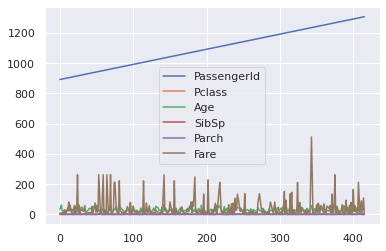

In [ ]:
data.plot()


#Task 7: Conceptualize the problem
##Does passenger gender predict the class of ticket they have?

In [ ]:
data.plot()
sns.pairplot(data,hue="Sex")
#sns.pairplot(data,hue="Pclass")

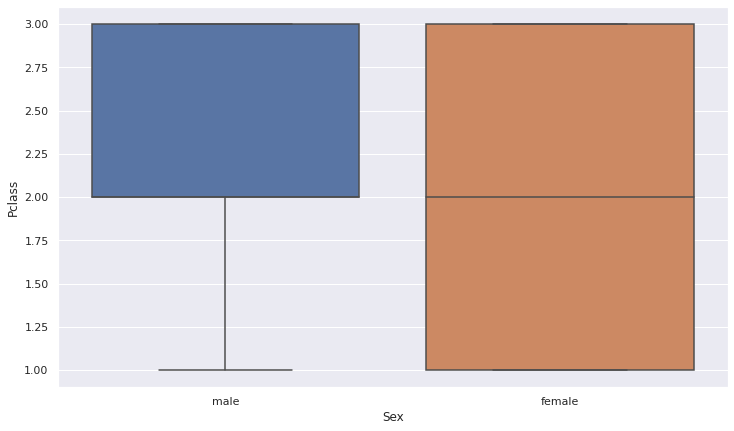

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex', y='Pclass', data=data)

In [ ]:
#I need sex to be Boolean (I think)
data=data.replace({'Sex': {'female': 1, 'male': 0}})
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.0,0,0,8.0,Q
1,893,3,1,47.0,1,0,7.0,S
2,894,2,0,62.0,0,0,10.0,Q
3,895,3,0,27.0,0,0,9.0,S
4,896,3,1,22.0,1,1,12.0,S


#Task 8: Perform Data-Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Pclass',axis=1), data['Pclass'], test_size = 0.25, random_state = 42)

In [ ]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.0,0,0,8.0
1,893,3,1,47.0,1,0,7.0
2,894,2,0,62.0,0,0,10.0
3,895,3,0,27.0,0,0,9.0
4,896,3,1,22.0,1,1,12.0
...,...,...,...,...,...,...,...
409,1301,3,1,3.0,1,1,14.0
411,1303,1,1,37.0,1,0,90.0
412,1304,3,1,28.0,0,0,8.0
414,1306,1,1,39.0,0,0,109.0


#Task 9: Choose the ML Method to follow

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#Task 10: Train the ML Model

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.94      0.77      0.85        22
           2       0.59      0.56      0.57        18
           3       0.85      0.95      0.90        43

    accuracy                           0.82        83
   macro avg       0.80      0.76      0.77        83
weighted avg       0.82      0.82      0.82        83



#Task 11: Test the Model
##up to this point I understand what I did, but at this stage I wanted to SEE result and also understand exactly how predictor was being used. I could not solve. :(

In [ ]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Pclass", pp!=0)
#print("Pclass", sum(pp==0))

0.8192771084337349
Pclass [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


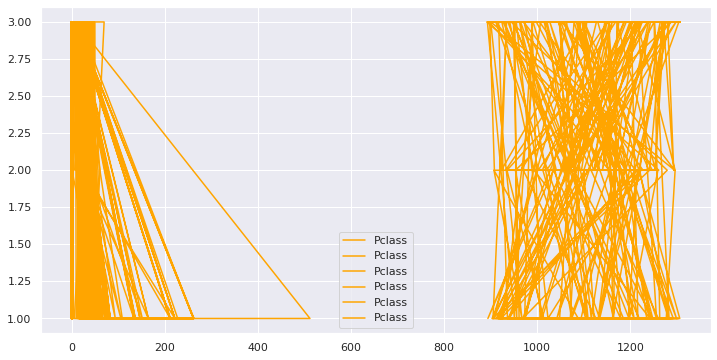

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
#plt.scatter(x_train, y_train, color="green", label="Population")
#plt.plot(X, Y, 'blue')   # scatter plot showing actual data
plt.plot(X_train,logmodel.predict(X_train),color="orange",label="Pclass") #what the model predicts
#plt.title('Population and profit')
#plt.xlabel('Population')
#plt.ylabel('Profit')
plt.legend()